In [1]:
pip install ucimlrepo



SyntaxError: invalid syntax (3835722027.py, line 1)

In [39]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import  train_test_split 
from sklearn.preprocessing import  StandardScaler 

from tensorflow.keras.models import  Sequential 

from tensorflow.keras.layers import  Dense 

from tensorflow.keras.losses import SparseCategoricalCrossentropy  

import matplotlib.pyplot as plt
import numpy as np



In [27]:
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 




In [28]:
#split dataset into training set and test set 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
#scale the features 

scalar=StandardScaler()

X_train_scaled=scalar.fit_transform(X_train) 
X_test_scaled=scalar.transform(X_test)

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Replace NaN with mean
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [31]:
# Build the neural network model

model=Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=32,activation='relu'),
    Dense(units=5,activation='softmax')
    
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:

#configure the model before build it 
model.compile(loss=SparseCategoricalCrossentropy(from_logits=False),optimizer='adam',metrics=['accuracy'])


In [33]:
#train model
history=model.fit(X_train_scaled,y_train,epochs=50,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1126 - loss: 1.8998 - val_accuracy: 0.1639 - val_loss: 1.7085
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2067 - loss: 1.6067 - val_accuracy: 0.4262 - val_loss: 1.5533
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4480 - loss: 1.4886 - val_accuracy: 0.5246 - val_loss: 1.4396
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6095 - loss: 1.3238 - val_accuracy: 0.4754 - val_loss: 1.3541
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5722 - loss: 1.2252 - val_accuracy: 0.4754 - val_loss: 1.2858
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6573 - loss: 1.0709 - val_accuracy: 0.4754 - val_loss: 1.2347
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6228 - loss: 1.0788 - val_accuracy: 0.4918 - val_loss: 1.1933
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6100 - loss: 1.0458 - val_accuracy: 0.4754 - val_loss: 1.1603
Epoch 9

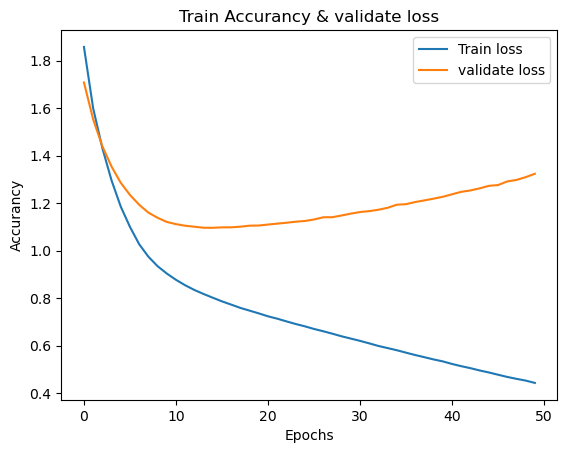

In [34]:
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='validate loss')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()
plt.title('Train Accurancy & validate loss')
plt.show()

In [35]:
y_pred_prob = model.predict(X_test_scaled)  # Check if still NaN
print(y_pred_prob[:11])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x138c76660> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[5.57019264e-02 5.04673347e-02 9.30570364e-02 7.82538772e-01
  1.82349496e-02]
 [2.03591317e-01 4.93215322e-01 1.37657866e-01 1.40748158e-01
  2.47873124e-02]
 [6.67457804e-02 1.99103728e-02 6.73827112e-01 1.91918746e-01
  4.75979149e-02]
 [4.18386877e-01 4.88457054e-01 7.17088878e-02 1.50169125e-02
  6.43030694e-03]
 [8.85362625e-02 5.14820337e-01 1.03613324e-01 2.50629038e-01
  4.24011238e-02]
 [3.47616686e-03 6.70580519e-03 6.04201794e-01 2.94353992e-01
  9.12622139e-02]
 [2.86460482e-02 1.51225194e-01 3.05444866e-01 3.27895433e-01
  1.86788380e-01]
 [1.08995344e-02 2.40184933e-01 2.26453394e-01 5.13936043e-01
  8.52598809e-03]
 [7.92361736e-01 1.97144762e-01 2.36557191e-03 4.33959393e-03
  3.78830056e-03]
 [2.53704846e-01 6.18302941e-01 5.43620214e-02 5.38512096e-02
  1.97789092e-02]
 [9.66183364e-01 3.25417109e-02 5.33185143e-04 1.22172307e-04
  6.19583006e-04]]


In [36]:
# Save the model
model.save("heart_disease_model.h5")

In [41]:
# Save the scaler
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scalar, f)